In [594]:
def clear_vars(): # same as above, but jupyter's built-in
    %reset -f

import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from sympy import *
init_printing()

# 6.1

In [595]:
t = symbols('t', real=True, positive=True)
w0, s = symbols('w0 s')

b = t * exp(-t) * Heaviside(t)
c = t * cos(w0 * t) * Heaviside(t)
d = (exp(2*t) - 2*exp(-t)) * Heaviside(t)
a = Heaviside(t) - Heaviside(t-1)

![Screenshot 2025-03-22 at 14.20.41.png](<attachment:Screenshot 2025-03-22 at 14.20.41.png>)
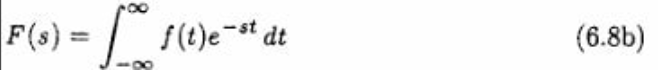

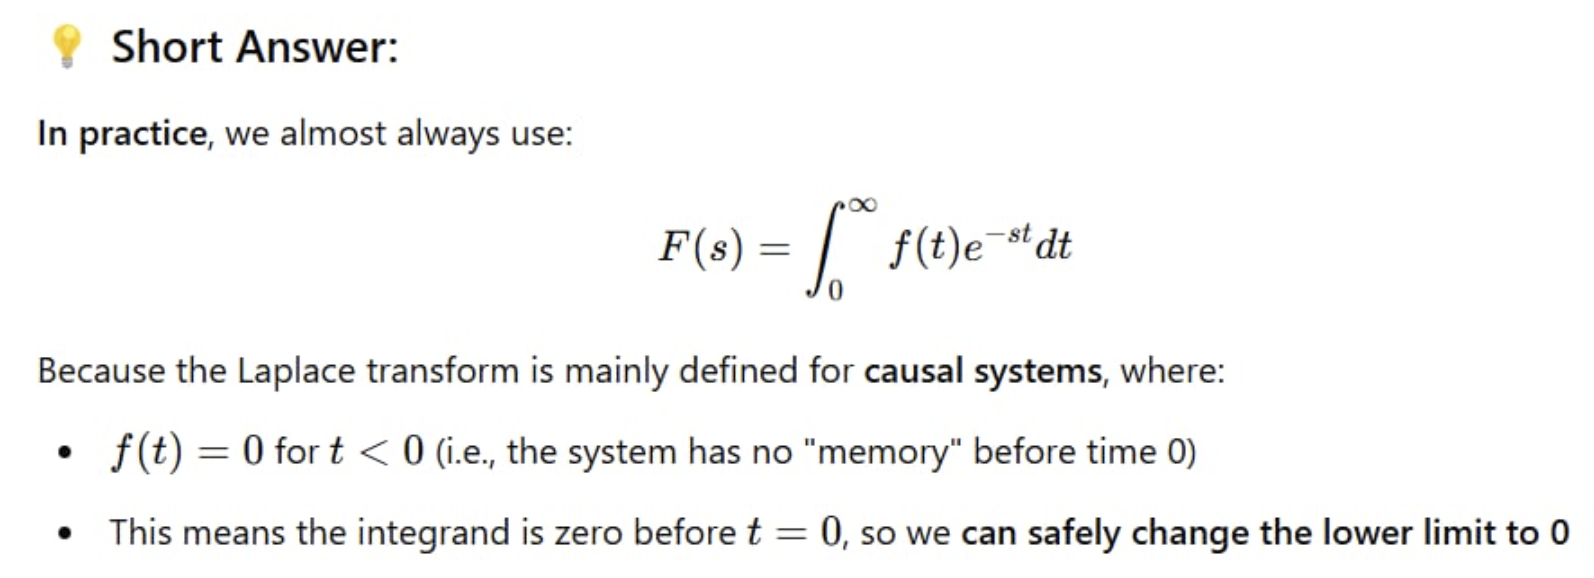

In [596]:
def F_s(f, t):
    integrand = f * exp(-s*t)
    return integrate(integrand, (t, -0, oo))

H_list = []
for f in [b, c, d, a]:
    F = F_s(f, t)
    H_list.append(F)
    display(F.simplify())



⎧        1                          π
⎪     ────────       for │arg(s)│ ≤ ─
⎪            2                      2
⎪     (s + 1)                        
⎪                                    
⎨∞                                   
⎪⌠                                   
⎪⎮    -t⋅(s + 1)                     
⎪⎮ t⋅ℯ           dt     otherwise    
⎪⌡                                   
⎩0                                   

⎧        2     2                                         
⎪       s  - w₀                                         π
⎪     ───────────        for │arg(w₀)│ = 0 ∧ │arg(s)│ < ─
⎪               2                                       2
⎪     ⎛ 2     2⎞                                         
⎪     ⎝s  + w₀ ⎠                                         
⎨                                                        
⎪∞                                                       
⎪⌠                                                       
⎪⎮    -s⋅t                                               
⎪⎮ t⋅ℯ    ⋅cos(t⋅w₀) dt             otherwise            
⎪⌡                                                       
⎩0                                                       

⎧           5 - s                                      π
⎪      ───────────────        for │s│ > 2 ∧ │arg(s)│ < ─
⎪      (s - 2)⋅(s + 1)                                 2
⎪                                                       
⎪∞                                                      
⎨⌠                                                      
⎪⎮ ⎛ 3⋅t    ⎞  -t⋅(s + 1)                               
⎪⎮ ⎝ℯ    - 2⎠⋅ℯ           dt          otherwise         
⎪⌡                                                      
⎪0                                                      
⎩                                                       

⎧      ⎛ s    ⎞  -s                         
⎪      ⎝ℯ  - 1⎠⋅ℯ                          π
⎪      ────────────         for │arg(s)│ < ─
⎪           s                              2
⎪                                           
⎨∞                                          
⎪⌠                                          
⎪⎮                 -s⋅t                     
⎪⎮ (1 - θ(t - 1))⋅ℯ     dt     otherwise    
⎪⌡                                          
⎩0                                          

region of convergence

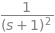

Numerator: 1
Denominator: (s + 1)**2


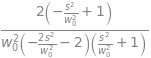

Numerator: -s**2 + w0**2
Denominator: (-s**2 - w0**2)*(s**2 + w0**2)


Numerator: s - 5
Denominator: (2 - s)*(s + 1)


Numerator: exp(s) - 1
Denominator: s*exp(s)


In [597]:
zero_list = []
pole_list = []
denom_list = []

for H_s in H_list:
    if isinstance(H_s, Piecewise):
        H_s = H_s.args[0][0]  # Extract the first expression (valid for ROC)
        display(H_s)

    H_s = H_s.together()
    num, denom = H_s.as_numer_denom()
    denom_list.append(denom)

    print(f"Numerator: {num}")
    print(f"Denominator: {denom}")

    # Extract poles and zeros
    zeros = solve(num, s)
    poles = solve(denom, s)

    zero_list.append(zeros)
    pole_list.append(poles)

display(zero_list) 
display(pole_list)
display(denom_list)

In [598]:
# same as just finding the poles in principle
for denom in denom_list:
    sol = solve((Eq(denom, 0)), s)
    display(sol)

ROC = the real part of s ==>

$\displaystyle \left[ -1\right]$ ==> -1

$\displaystyle \left[ - i w_{0}, \  i w_{0}\right]$ ==> 0

$\displaystyle \left[ -1, \  2\right]$ ==> 2

$\displaystyle \left[ 0\right]$ ==> 0

# 6.3

In [599]:
t = symbols('t', real=True, positive=True)
s = symbols('s')

Fa = (2*s + 5) / (s**2 + 5*s + 6)
Fb = (3*s + 5) / (s**2 + 4*s + 13)
Fc = (s + 1)**2 / (s**2 - s - 6)
Fd = 5 / (s**2 * (s + 2))
Fe = (2*s + 1) / ((s + 1)*(s**2 + 2*s + 2))

F_list = [Fa, Fb, Fc, Fd, Fe]

test if partial fraction expansion is possible (using apart()). If it is, use the 

inverse Laplace transform using the results of the partial

fraction expansion.

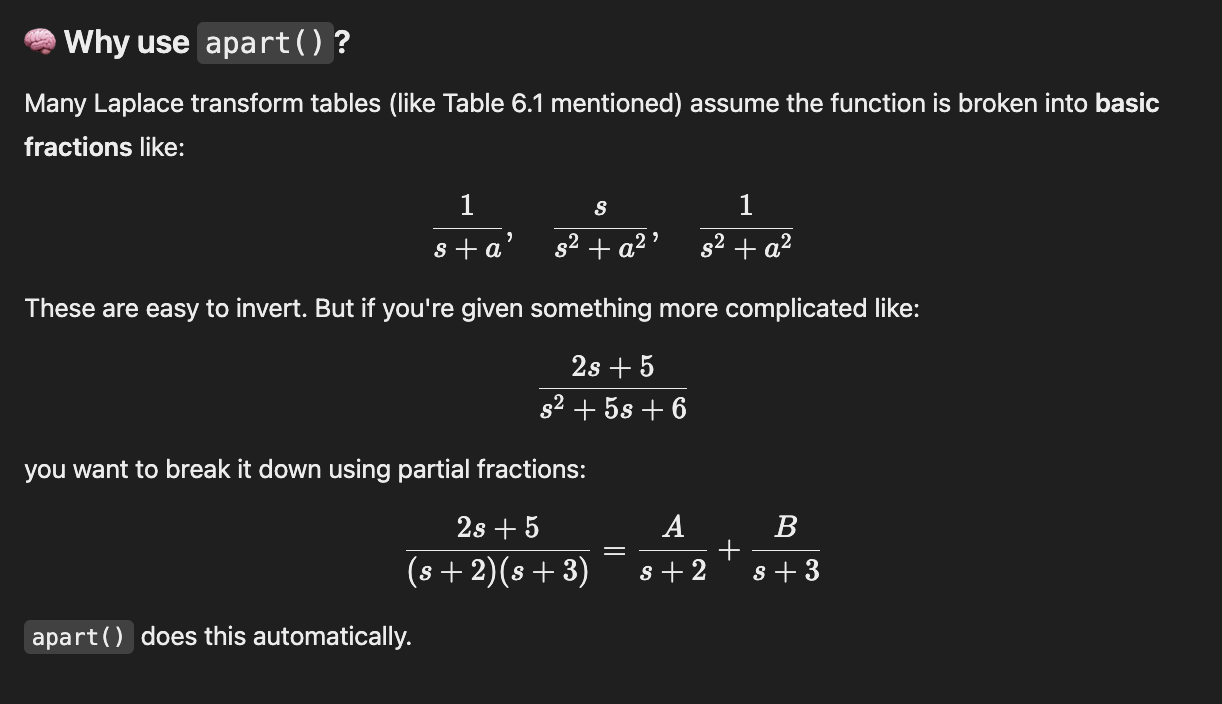

In [600]:
f_list = []
for F in F_list:
    F_apart = apart(F, s)
    display(F_apart)
    f = inverse_laplace_transform(F_apart, s, t)
    f_list.append(f)

In [601]:
for f in f_list:
    # display(f)
    # display(f.collect(exp(-t)))
    display(f.simplify())

in maple the inverse laplace of 1 is DiracDelta(t) 

(in case answer differs with DiracDelta(t))

## checking for proper/improper rationals (not necessarily necessary)

it is necessary to check for improper rationals since apart() only works for proper rationals

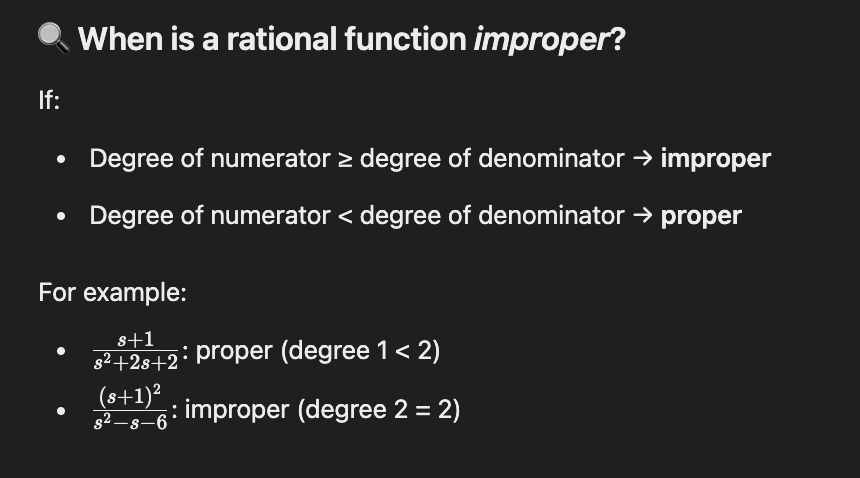

In [602]:
f_list = []
for F in F_list:
    num, denom = F.as_numer_denom()
    if degree(num, s) >= degree(denom, s):
        # Improper fraction: use polynomial division
        quot, rem = div(num, denom, domain='QQ') # div() does polynomial division
        F_proper = quot + (rem / denom)
    else:
        F_proper = F

    F_apart = apart(F_proper, s)
    display(F_apart)

    f = inverse_laplace_transform(F_apart, s, t)
    f_list.append(f)

In [603]:
for f in f_list:
    display(f)
    # display(f.collect(exp(-t)))

in maple the inverse laplace of 1 is DiracDelta(t) 

(in case answer differs with DiracDelta(t))

## table 6.1 (to compare results with)

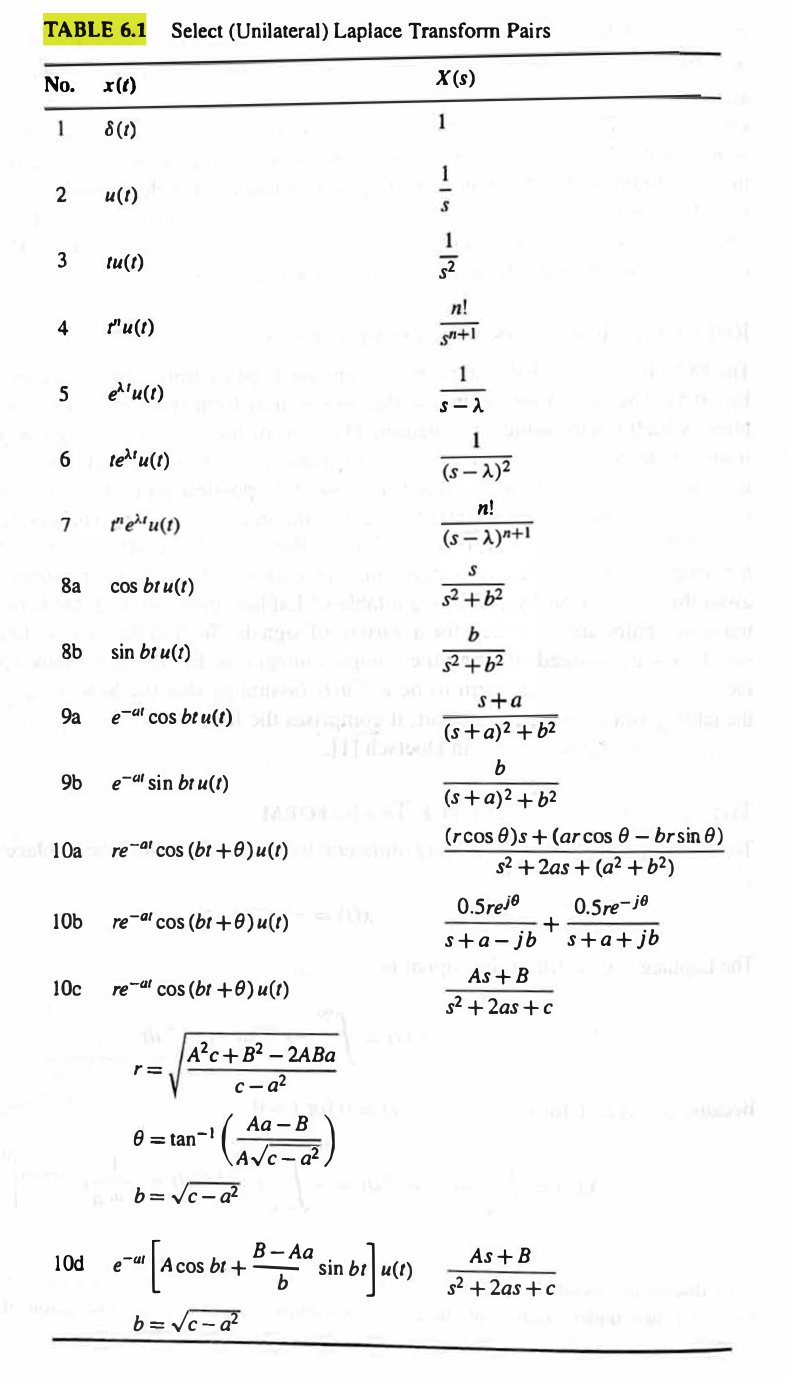